##### Nigel K. Gondo: Data Warrior Analytics

###### Forecasting South Africa's inflation rate from the 1st quarter of 2023 to the 1st Quarter of 2024 (Autoregression Model)

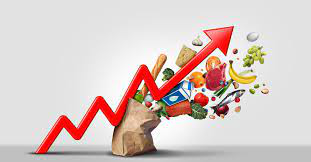

In [1]:
from PIL import Image
Image.open('inflation.jpeg')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-description" data-toc-modified-id="Brief-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief description</a></span></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Importing-the-CPI-data-of-different-baskets-of-goods-and-services" data-toc-modified-id="Importing-the-CPI-data-of-different-baskets-of-goods-and-services-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the CPI data of different baskets of goods and services</a></span><ul class="toc-item"><li><span><a href="#CPI-for-all-items-for-South-Africa" data-toc-modified-id="CPI-for-all-items-for-South-Africa-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CPI for all items for South Africa</a></span></li><li><span><a href="#Key-groups-that-make-up-the-CPI-for-South-Africa-(Energy,-Food-&amp;-Beverage,-Communication,-Transport,-Education,-Health,-Recreation-&amp;-Culture,-and-Housing" data-toc-modified-id="Key-groups-that-make-up-the-CPI-for-South-Africa-(Energy,-Food-&amp;-Beverage,-Communication,-Transport,-Education,-Health,-Recreation-&amp;-Culture,-and-Housing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Key groups that make up the CPI for South Africa (Energy, Food &amp; Beverage, Communication, Transport, Education, Health, Recreation &amp; Culture, and Housing</a></span></li></ul></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Time-series-of-inflation-and-CPI-(CPI-Groups)" data-toc-modified-id="Time-series-of-inflation-and-CPI-(CPI-Groups)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Time series of inflation and CPI (CPI Groups)</a></span></li><li><span><a href="#Time-series-of-repo-rate,-inflation-and-CPI-of-all-items" data-toc-modified-id="Time-series-of-repo-rate,-inflation-and-CPI-of-all-items-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Time series of repo rate, inflation and CPI of all items</a></span></li><li><span><a href="#Autocorrelation-of-inflation" data-toc-modified-id="Autocorrelation-of-inflation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Autocorrelation of inflation</a></span></li></ul></li><li><span><a href="#Forecasting-the-model-with-AR" data-toc-modified-id="Forecasting-the-model-with-AR-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecasting the model with AR</a></span></li><li><span><a href="#Final-thoughts" data-toc-modified-id="Final-thoughts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final thoughts</a></span></li></ul></div>

# Brief description

South Africa, along with many other countries, has been facing cost of living challenges for the past few years which have been attributed to several factors such as the covid pandemic, the war in Ukraine and the rolling power cuts affecting both businesses and the general populous. 

So, the best way to evaluate these cost-of-living challenges is by analysing and forecasting inflation which is the main objective of this project. Inflation can be simply defined as the rate at which the prices of goods and services rise, and this rate can be calculated from the consumer price index (CPI). CPI measures the changes in the purchasing power of a country’s currency, and the price level of a basket of goods and services.

Predicting inflation is crucial for monetary policy because it helps the central bank in planning how they can control inflation through the repo rate, which is the rate at which commercial banks borrow money from the central bank, and as a consequence, this will influence the lending rate that these commercial banks will offer to their clients. So, in this project, the repo will be briefly analysed as well.

The forecasting model for this project will be the ‘Autoregression Model’. This model uses observations from the previous time steps to predict the value of the next time steps. The model assumes that observations from a previous time step are useful for predicting the next time step.


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from fredapi import Fred
fred = Fred(api_key='3f1d0185cb8edf167ab9c542609c1b71')
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

# Importing the CPI data of different baskets of goods and services

## CPI for all items for South Africa

In [3]:
#import CPI data of all items from FRED using API key
df_cpi_all_items_sa = pd.DataFrame(fred.get_series('ZAFCPIALLQINMEI' ))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: All items for South Africa'})

#creating inflation column
df_cpi_all_items_sa['All items inflation'] = df_cpi_all_items_sa['Consumer Price Index: All items for South Africa'].pct_change()*100
#dropping null values
df_cpi_all_items_sa.dropna(inplace=True)

In [4]:
df_cpi_all_items_sa.tail()

,Quartely period,Consumer Price Index: All items for South Africa,All items inflation
259,2021-10-01,134.308541,1.049780
260,2022-01-01,136.333971,1.508043
261,2022-04-01,139.529650,2.344008
262,2022-07-01,143.445482,2.806452
263,2022-10-01,144.615731,0.815814


## Key groups that make up the CPI for South Africa (Energy, Food & Beverage, Communication, Transport, Education, Health, Recreation & Culture, and Housing

In [5]:
#importing energy cpi from FRED API key
df_cpi_energy_sa = pd.DataFrame(fred.get_series('ZAFCPIENGQINMEI'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Energy for South Africa'})
#creating inflation column
df_cpi_energy_sa['Energy inflation'] = df_cpi_energy_sa['Consumer Price Index: Energy for South Africa']\
                                    .pct_change()*100
#dropping null values
df_cpi_energy_sa.dropna(inplace=True)

#_______________________________________________________________
#importing food and non-alcoholic beverage cpi from FRED
df_cpi_food_beverage_sa = pd.DataFrame(fred.get_series('ZAFCP010000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Food and non-Alcoholic beverages for South Africa'})
#creating inflation column
df_cpi_food_beverage_sa['Food and beverage inflation'] = df_cpi_food_beverage_sa['Consumer Price Index: Food and non-Alcoholic beverages for South Africa']\
                                                        .pct_change()*100
#dropping null values
df_cpi_food_beverage_sa.dropna(inplace=True)

#_______________________________________________________________
#importing communication cpi from FRED
df_cpi_communication_sa = pd.DataFrame(fred.get_series('ZAFCP080000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Communication for South Africa'})
#creating inflation column
df_cpi_communication_sa['Communication inflation'] = df_cpi_communication_sa['Consumer Price Index: Communication for South Africa']\
                                                    .pct_change()*100
#dropping null values
df_cpi_communication_sa.dropna(inplace=True)

#_______________________________________________________________
#importing transport cpi from FRED
df_cpi_transport_sa = pd.DataFrame(fred.get_series('ZAFCP070000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Transport for South Africa'})
#creating inflation column
df_cpi_transport_sa['Transport inflation'] = df_cpi_transport_sa['Consumer Price Index: Transport for South Africa']\
                                            .pct_change()*100
#dropping null values
df_cpi_transport_sa.dropna(inplace=True)

#_______________________________________________________________
#importing education cpi from FRED
df_cpi_education_sa = pd.DataFrame(fred.get_series('ZAFCP100000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Education for South Africa'})
#creating inflation column
df_cpi_education_sa['Education inflation'] = df_cpi_education_sa['Consumer Price Index: Education for South Africa']\
                                            .pct_change()*100
#dropping null values
df_cpi_education_sa.dropna(inplace=True)

#_______________________________________________________________
#importing health cpi
df_cpi_health_sa = pd.DataFrame(fred.get_series('ZAFCP060000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                                 0:'Consumer Price Index: Health for South Africa'})
#creating inflation column
df_cpi_health_sa['Health inflation'] = df_cpi_health_sa['Consumer Price Index: Health for South Africa']\
                                    .pct_change()*100
#dropping null values
df_cpi_health_sa.dropna(inplace=True)

#_______________________________________________________________
#importing recreation and culture cpi from FRED
df_cpi_recreation_culture_sa = pd.DataFrame(fred.get_series('ZAFCP090000IXOBQ'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Recreation & Culture for South Africa'})
#creating inflation column
df_cpi_recreation_culture_sa['Recreation and culture inflation'] = df_cpi_recreation_culture_sa['Consumer Price Index: Recreation & Culture for South Africa']\
                                                                .pct_change()*100
#dropping null values
df_cpi_recreation_culture_sa.dropna(inplace=True)

#_______________________________________________________________
#importing housing cpi from FRED
df_cpi_housing_sa = pd.DataFrame(fred.get_series('ZAFCPIHOUQINMEI'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Consumer Price Index: Housing for South Africa'})
#creating inflation column
df_cpi_housing_sa['Housing inflation'] = df_cpi_housing_sa['Consumer Price Index: Housing for South Africa']\
                                        .pct_change()*100
#dropping null values
df_cpi_housing_sa.dropna(inplace=True)

In [6]:
#Merging the CPI/inflation data to one data frame
df_inflation_rates = pd.merge(df_cpi_energy_sa,
                              df_cpi_food_beverage_sa,
                              on='Quartely period', 
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_communication_sa,
                              on='Quartely period', 
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_transport_sa,
                              on='Quartely period', 
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_education_sa,
                              on='Quartely period',
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_health_sa,
                              on='Quartely period', 
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_recreation_culture_sa
                              ,on='Quartely period', 
                              how='outer')

df_inflation_rates = pd.merge(df_inflation_rates, 
                              df_cpi_housing_sa,
                              on='Quartely period', 
                              how='outer')

In [7]:
#there are a number of null values in the data frame so creating a new data fram with 
df_inflation_rates_fillna = df_inflation_rates.fillna(0)

In [8]:
df_inflation_rates_fillna.head()

,Quartely period,Consumer Price Index: Energy for South Africa,Energy inflation,Consumer Price Index: Food and non-Alcoholic beverages for South Africa,Food and beverage inflation,Consumer Price Index: Communication for South Africa,Communication inflation,Consumer Price Index: Transport for South Africa,Transport inflation,Consumer Price Index: Education for South Africa,Education inflation,Consumer Price Index: Health for South Africa,Health inflation,Consumer Price Index: Recreation & Culture for South Africa,Recreation and culture inflation,Consumer Price Index: Housing for South Africa,Housing inflation
0,2002-04-01,31.186813,5.805580,42.717706,4.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.664667,5.574789
1,2002-07-01,31.136796,-0.160378,44.727075,4.703833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.663576,5.503237
2,2002-10-01,31.742866,1.946474,46.600736,4.189097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.840708,4.144252
3,2003-01-01,31.280543,-1.456463,47.121683,1.117896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.479189,0.799694
4,2003-04-01,30.974051,-0.979817,47.233315,0.236901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.928265,0.558002


In [9]:
#importing South Africs repo rate data from FRED API key
df_repo = pd.DataFrame(fred.get_series('IRSTCB01ZAQ156N'))\
                .reset_index()\
                .rename(columns={'index':'Quartely period',
                0:'Central Bank Rates for South Africa'})
df_repo.head()

,Quartely period,Central Bank Rates for South Africa
0,1957-01-01,NaN
1,1957-04-01,NaN
2,1957-07-01,NaN
3,1957-10-01,NaN
4,1958-01-01,NaN


In [10]:
#merging the repo rate dataframe with inflation for all items
df_inflation_repo = pd.merge(df_repo, 
                             df_cpi_all_items_sa[['Quartely period', 
                                                  'All items inflation']], 
                             on='Quartely period', 
                             how='outer')

In [11]:
print(df_inflation_repo.head())
print(df_inflation_repo.tail())

  Quartely period  Central Bank Rates for South Africa  All items inflation
0      1957-01-01                                  NaN                  NaN
1      1957-04-01                                  NaN                  NaN
2      1957-07-01                                  NaN                  NaN
3      1957-10-01                                  NaN                  NaN
4      1958-01-01                                  NaN                  NaN
    Quartely period  Central Bank Rates for South Africa  All items inflation
260      2022-01-01                             4.056818             1.508043
261      2022-04-01                             4.750000             2.344008
262      2022-07-01                             5.704545             2.806452
263      2022-10-01                             7.000000             0.815814
264      2023-01-01                             7.272727                  NaN


In [12]:
#dropping all null values
df_inflation_repo.dropna(inplace=True)

In [13]:
#checking on the data types
df_inflation_repo.dtypes

Quartely period                        datetime64[ns]
Central Bank Rates for South Africa           float64
All items inflation                           float64
dtype: object

In [14]:
print(df_inflation_repo.head())
print(df_inflation_repo.tail())

   Quartely period  Central Bank Rates for South Africa  All items inflation
13      1960-04-01                                  4.0             0.893855
14      1960-07-01                                  4.5             0.553710
15      1960-10-01                                  4.5             0.110132
16      1961-01-01                                  4.5             0.550055
17      1961-04-01                                  5.0             0.875274
    Quartely period  Central Bank Rates for South Africa  All items inflation
259      2021-10-01                             3.750000             1.049780
260      2022-01-01                             4.056818             1.508043
261      2022-04-01                             4.750000             2.344008
262      2022-07-01                             5.704545             2.806452
263      2022-10-01                             7.000000             0.815814


# Summary Statistics

In [15]:
#summary statistics
df_inflation_repo.describe()

,Central Bank Rates for South Africa,All items inflation
count,251.000000,251.000000
mean,9.113617,1.888753
std,4.653769,1.308455
min,2.350000,-1.927456
25%,5.500000,0.840960
50%,7.000000,1.652893
75%,12.140833,2.838379
max,21.850000,6.137184


In [16]:
#summary statistics
print(df_cpi_energy_sa.describe())
print('_______________________________________________________________')
print(df_cpi_food_beverage_sa.describe())
print('_______________________________________________________________')
print(df_cpi_communication_sa.describe())
print('_______________________________________________________________')
print(df_cpi_transport_sa.describe())
print('_______________________________________________________________')
print(df_cpi_education_sa.describe())
print('_______________________________________________________________')
print(df_cpi_health_sa.describe())
print('_______________________________________________________________')
print(df_cpi_recreation_culture_sa.describe())
print('_______________________________________________________________')
print(df_cpi_housing_sa.describe())

       Consumer Price Index: Energy for South Africa  Energy inflation
count                                      83.000000         83.000000
mean                                       85.785984          2.405190
std                                        42.637327          5.156782
min                                        30.974051        -14.097262
25%                                        45.442369         -0.324286
50%                                        86.840824          2.650942
75%                                       113.269101          5.602828
max                                       197.277506         13.854950
_______________________________________________________________
       Consumer Price Index: Food and non-Alcoholic beverages for South Africa  \
count                                         211.000000                         
mean                                           42.652215                         
std                                            44.1

# Exploratory data analysis (EDA)

## Time series of inflation and CPI (CPI Groups)

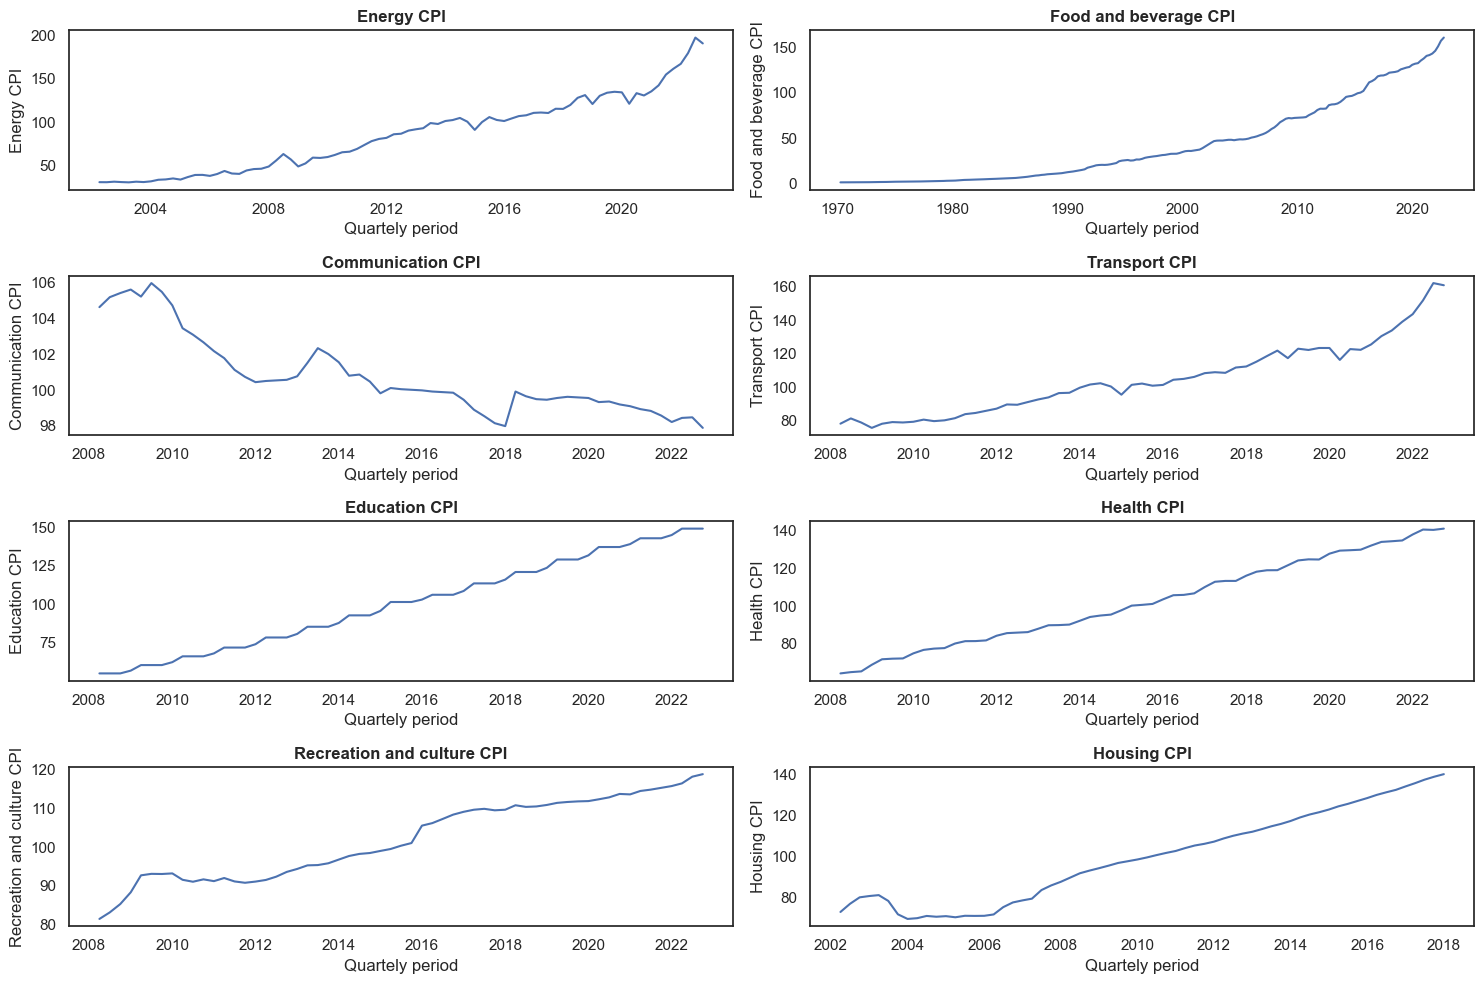

In [17]:
#plotting subplot line charts
fig, ax = plt.subplots(nrows=4,ncols=2)

sns.lineplot(x='Quartely period', 
             y='Consumer Price Index: Energy for South Africa', 
             data=df_inflation_rates,
             ax=ax[0,0])
ax[0,0].set_title('Energy CPI', 
                  fontweight='bold')
ax[0,0].set_ylabel('Energy CPI')

sns.lineplot(x='Quartely period', 
             y='Consumer Price Index: Food and non-Alcoholic beverages for South Africa', 
             data=df_inflation_rates,
             ax=ax[0,1])
ax[0,1].set_title('Food and beverage CPI', 
                  fontweight='bold')
ax[0,1].set_ylabel('Food and beverage CPI')

sns.lineplot(x='Quartely period', 
             y='Consumer Price Index: Communication for South Africa', 
             data=df_inflation_rates,
             ax=ax[1,0])
ax[1,0].set_title('Communication CPI', 
                  fontweight='bold')
ax[1,0].set_ylabel('Communication CPI')

sns.lineplot(x='Quartely period', 
             y='Consumer Price Index: Transport for South Africa', 
             data=df_inflation_rates,
             ax=ax[1,1])
ax[1,1].set_title('Transport CPI', 
                  fontweight='bold')
ax[1,1].set_ylabel('Transport CPI')

sns.lineplot(x='Quartely period',
             y='Consumer Price Index: Education for South Africa', 
             data=df_inflation_rates,
             ax=ax[2,0])
ax[2,0].set_title('Education CPI', 
                  fontweight='bold')
ax[2,0].set_ylabel('Education CPI')

sns.lineplot(x='Quartely period',
             y='Consumer Price Index: Health for South Africa',
             data=df_inflation_rates,
             ax=ax[2,1])
ax[2,1].set_title('Health CPI',
                  fontweight='bold')
ax[2,1].set_ylabel('Health CPI')

sns.lineplot(x='Quartely period',
             y='Consumer Price Index: Recreation & Culture for South Africa', 
             data=df_inflation_rates,
             ax=ax[3,0])
ax[3,0].set_title('Recreation and culture CPI', 
                  fontweight='bold')
ax[3,0].set_ylabel('Recreation and culture CPI')

sns.lineplot(x='Quartely period', 
             y='Consumer Price Index: Housing for South Africa',
             data=df_inflation_rates,
             ax=ax[3,1])
ax[3,1].set_title('Housing CPI', 
                  fontweight='bold')
ax[3,1].set_ylabel('Housing CPI')

plt.tight_layout()

plt.show()

The communication CPI is the only group that has been declining over time.

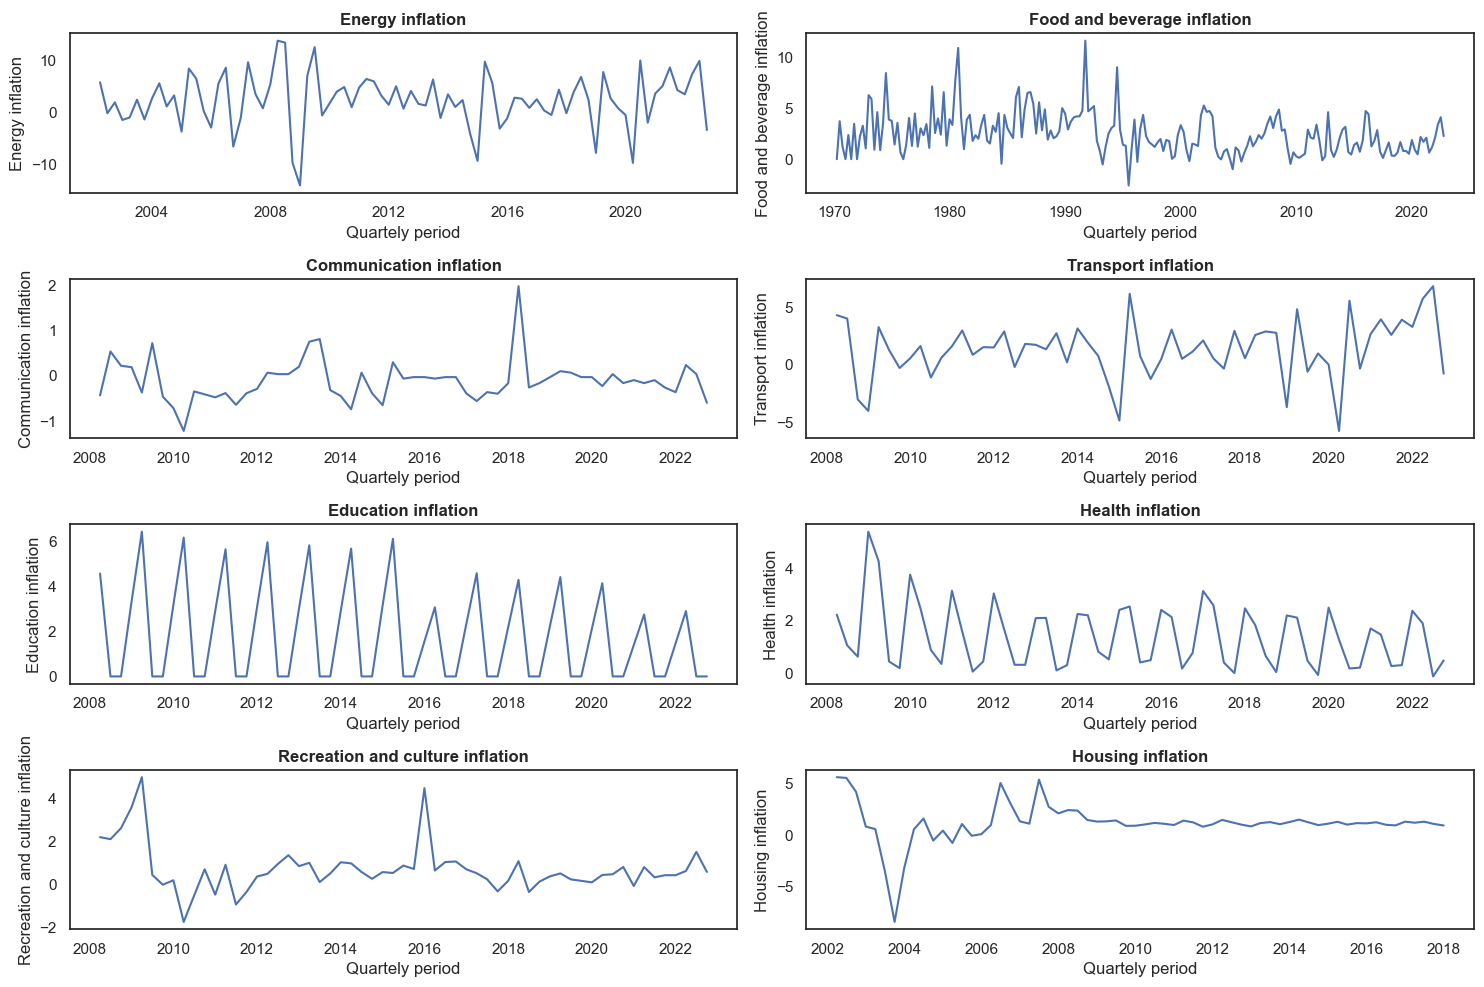

In [18]:
#plotting subplot line charts
fig, ax = plt.subplots(nrows=4,ncols=2)

sns.lineplot(x='Quartely period', 
             y='Energy inflation', 
             data=df_inflation_rates,
             ax=ax[0,0])
ax[0,0].set_title('Energy inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period', 
             y='Food and beverage inflation', 
             data=df_inflation_rates,
             ax=ax[0,1])
ax[0,1].set_title('Food and beverage inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period', 
             y='Communication inflation', 
             data=df_inflation_rates,
             ax=ax[1,0])
ax[1,0].set_title('Communication inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period', 
             y='Transport inflation', 
             data=df_inflation_rates,
             ax=ax[1,1])
ax[1,1].set_title('Transport inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period',
             y='Education inflation', 
             data=df_inflation_rates,
             ax=ax[2,0])
ax[2,0].set_title('Education inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period',
             y='Health inflation',
             data=df_inflation_rates,
             ax=ax[2,1])
ax[2,1].set_title('Health inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period',
             y='Recreation and culture inflation', 
             data=df_inflation_rates,
             ax=ax[3,0])
ax[3,0].set_title('Recreation and culture inflation', 
                  fontweight='bold')

sns.lineplot(x='Quartely period', 
             y='Housing inflation',
             data=df_inflation_rates,
             ax=ax[3,1])
ax[3,1].set_title('Housing inflation', 
                  fontweight='bold')

plt.tight_layout()

## Time series of repo rate, inflation and CPI of all items

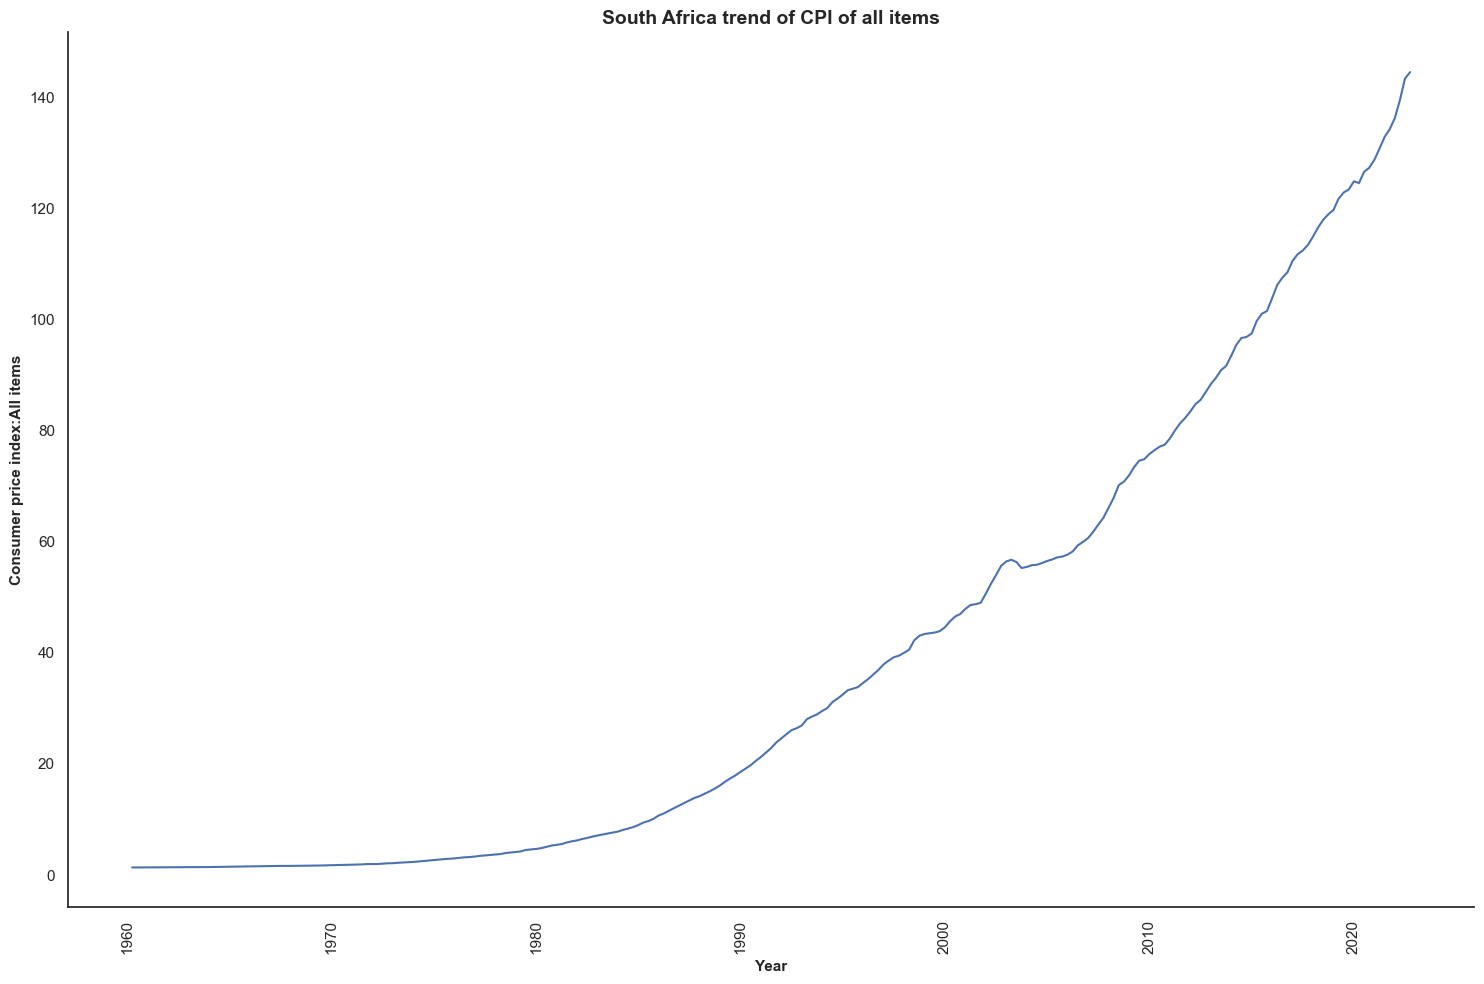

In [19]:
#plotting line chart
fig, ax = plt.subplots() 

sns.lineplot(x='Quartely period', 
            y='Consumer Price Index: All items for South Africa', 
            data=df_cpi_all_items_sa)

plt.ylabel('Consumer price index:All items', 
           fontsize=11, 
           fontweight='bold')

plt.xlabel('Year', 
           fontsize=11, 
           fontweight='bold')

plt.xticks(rotation=90)

plt.title('South Africa trend of CPI of all items',
          fontsize=14, 
          fontweight='bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

From the year 1990 the CPI has been rising exponentially.

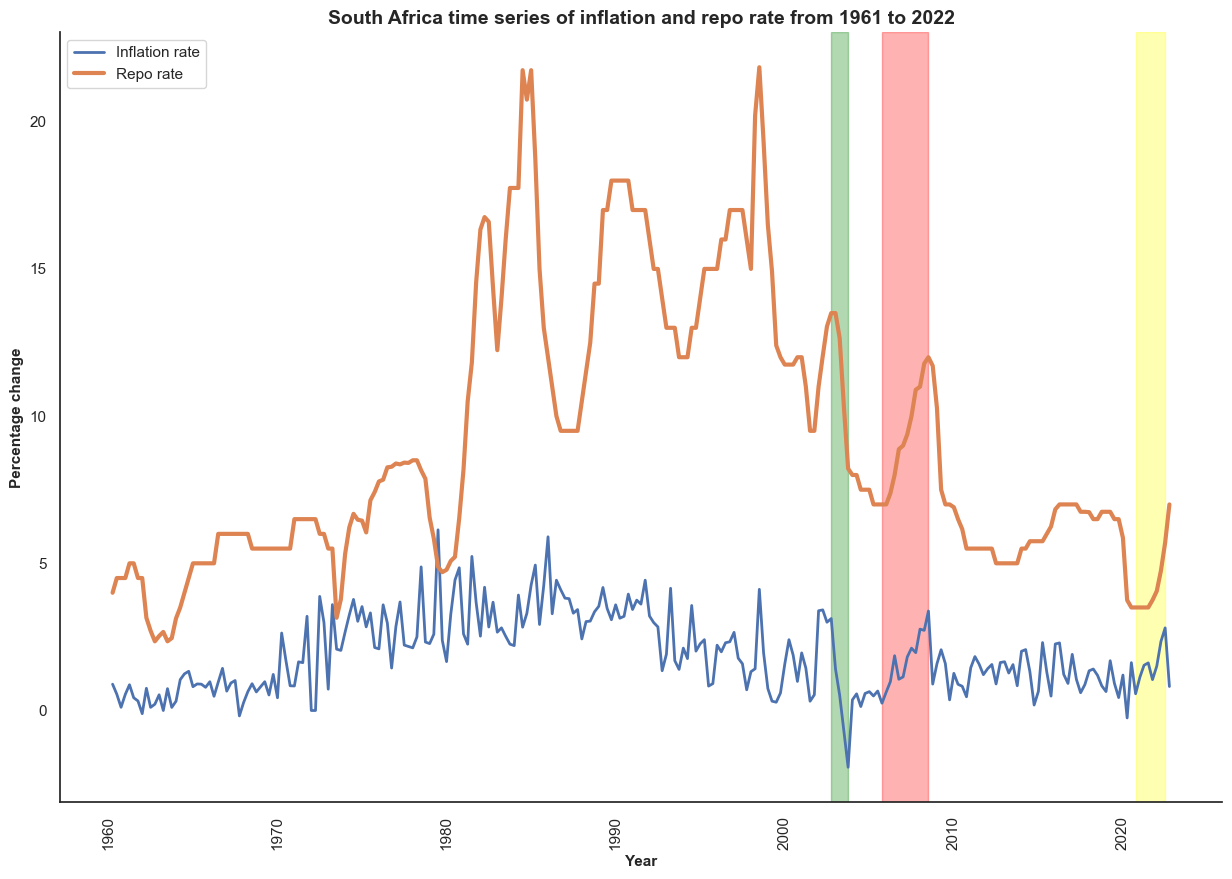

In [20]:
#Time series plot of inflation rate and repo rate
fig, ax = plt.subplots() 
sns.lineplot(x='Quartely period',
             y='All items inflation', 
             data=df_inflation_repo, 
             linewidth=2)

sns.lineplot(x='Quartely period', 
             y='Central Bank Rates for South Africa', 
             data=df_inflation_repo, 
             linewidth=3)

plt.legend(['Inflation rate','Repo rate'])

plt.ylabel('Percentage change', 
           fontsize=11, 
           fontweight='bold')

plt.xlabel('Year', 
           fontsize=11, 
           fontweight='bold')

plt.title('South Africa time series of inflation and repo rate from 1961 to 2022',
          fontsize=14, 
          fontweight='bold')

plt.xticks(rotation = 90)

ax.axvspan('2002-10-01', '2003-10-01',
           alpha=0.3, 
           color='green')

ax.axvspan('2005-10-01', '2008-07-01',
           alpha=0.3, 
           color='red')

ax.axvspan('2020-10-01', '2022-07-01',
           alpha=0.3, 
           color='yellow')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

From the line chart inflation and repo rate move in the same direction so there is a form of positive correlation between the two however this can be considered partial correlation because of the lagged reaction that inflation will have when interest rates are changed.

From October 2002 to October 2003 (highlighted in green) there was a sharp decline in inflation.

From October 2005 to July 2008 (highlighted in red) there was a gradual increase in inflation.

From October 2022 to July 2022 (highlighted in yellow) there was a gradual increase in inflation.

<AxesSubplot:>

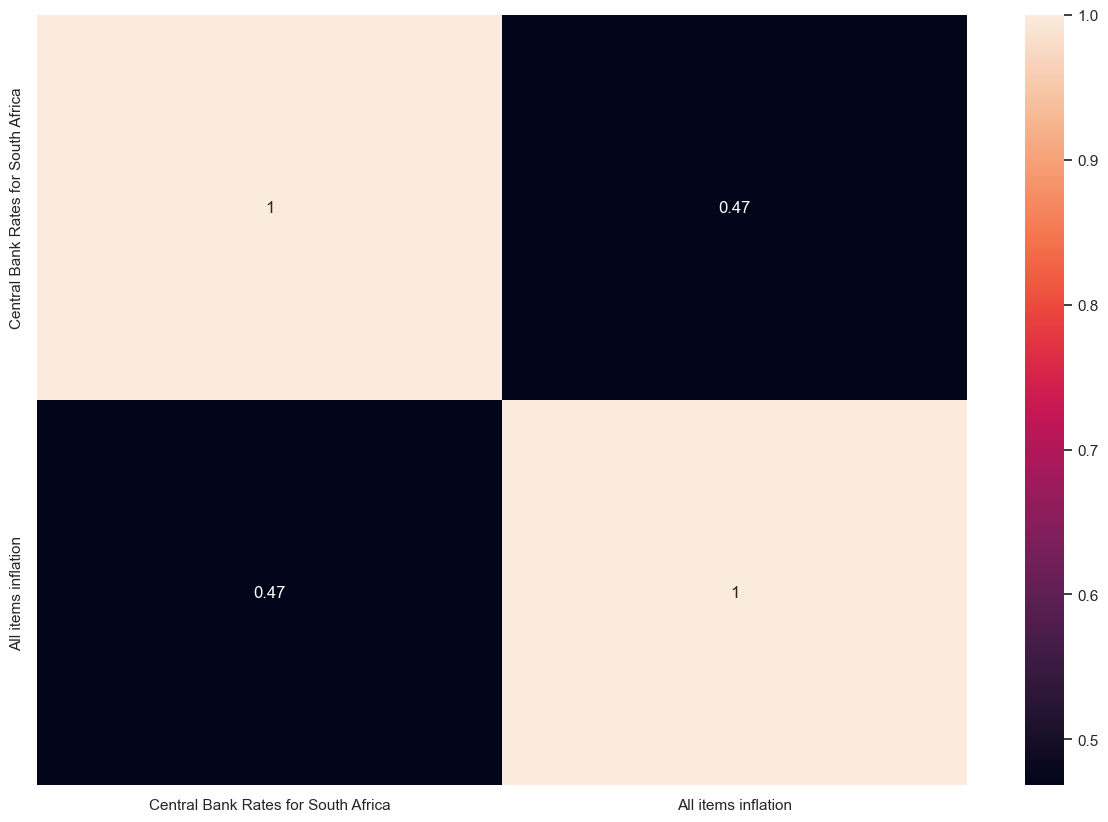

In [21]:
#viewing the correlation between interest rates and inflation
sns.heatmap(df_inflation_repo.corr(), annot=True)

From the heat map there is a partial correlation between these two variables.

## Autocorrelation of inflation

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. In simple terms this is a measurement of the relationship between current and past values.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


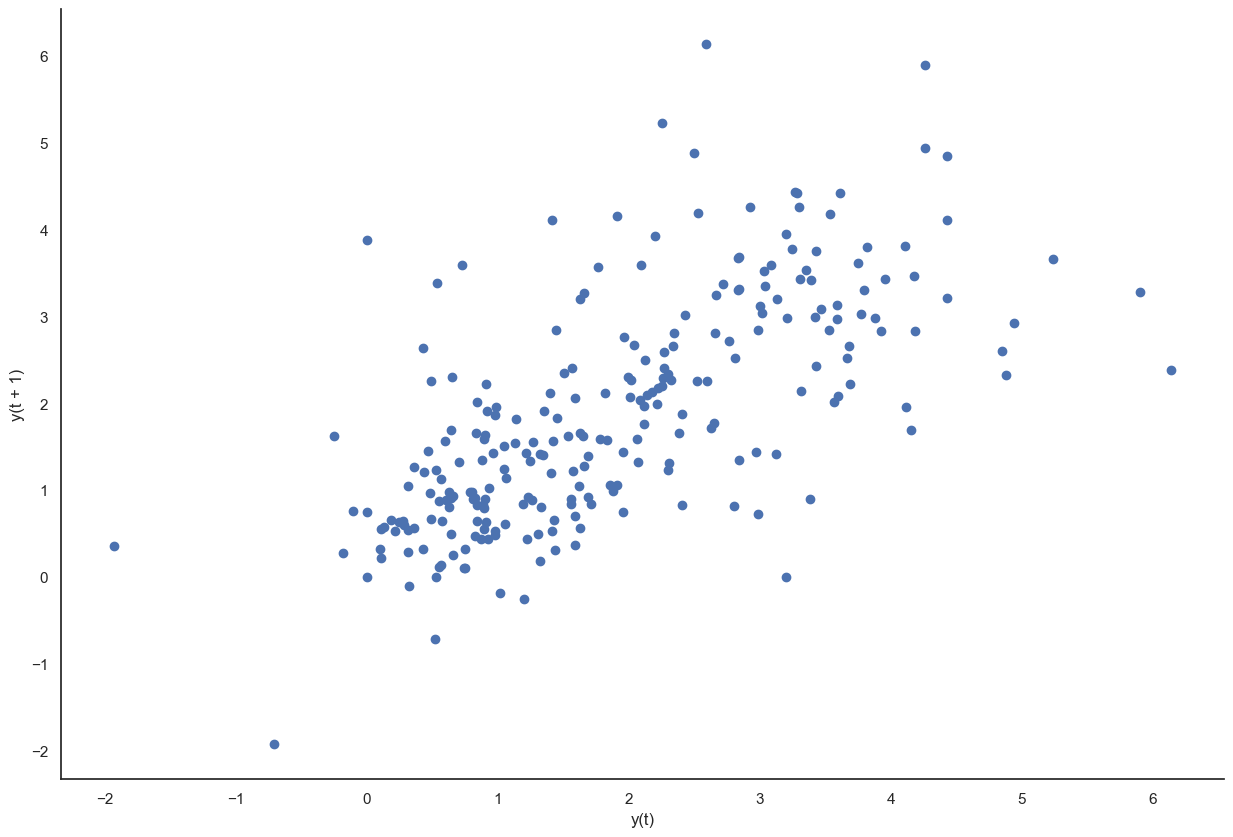

In [22]:
#Scatter plot to check autocorrelation
fig, ax = plt.subplots() 

lag_plot(df_inflation_repo['All items inflation'])

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

This scatter gives us a quick visual correlation between the  previous time step and the next time step.

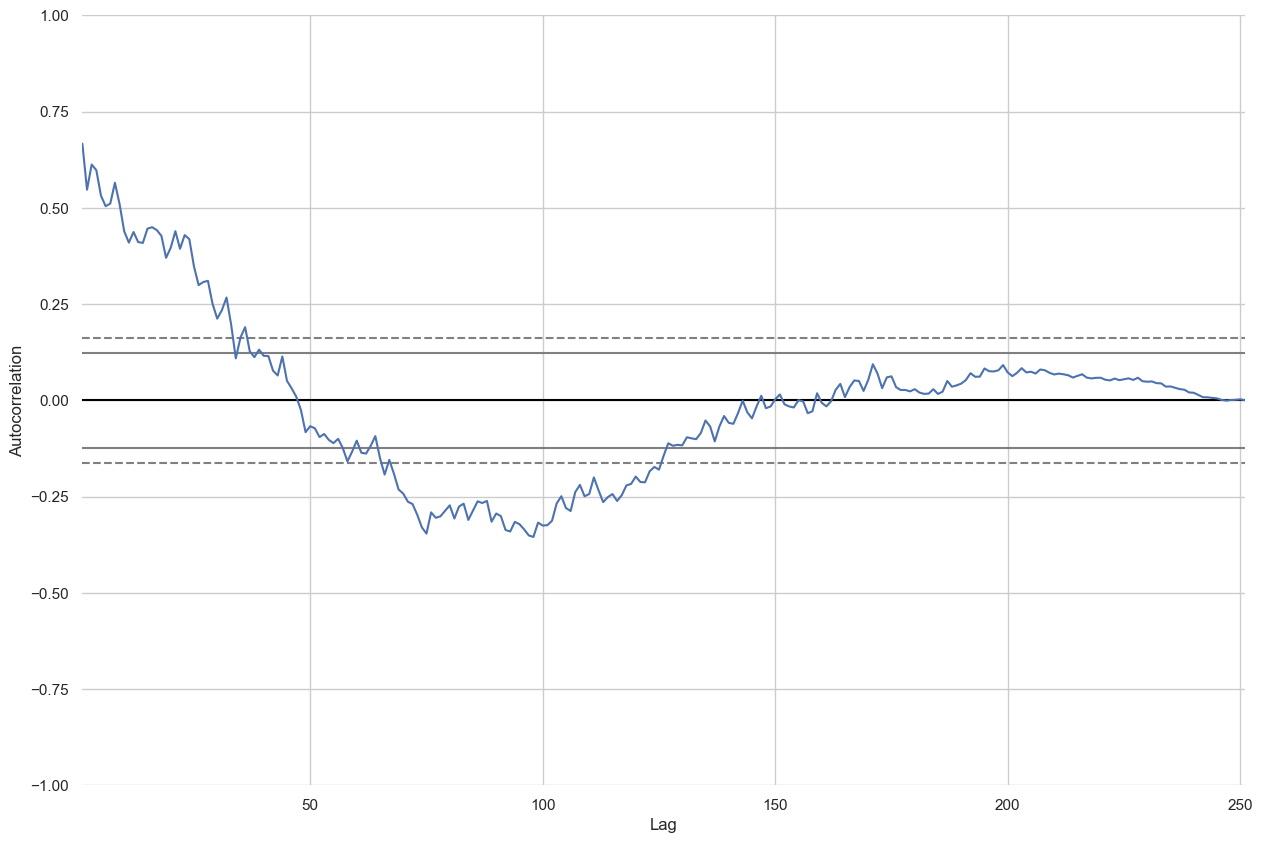

In [23]:
#autocorrelation plots
autocorrelation_plot(df_inflation_repo['All items inflation'])
plt.box(False)
plt.show()

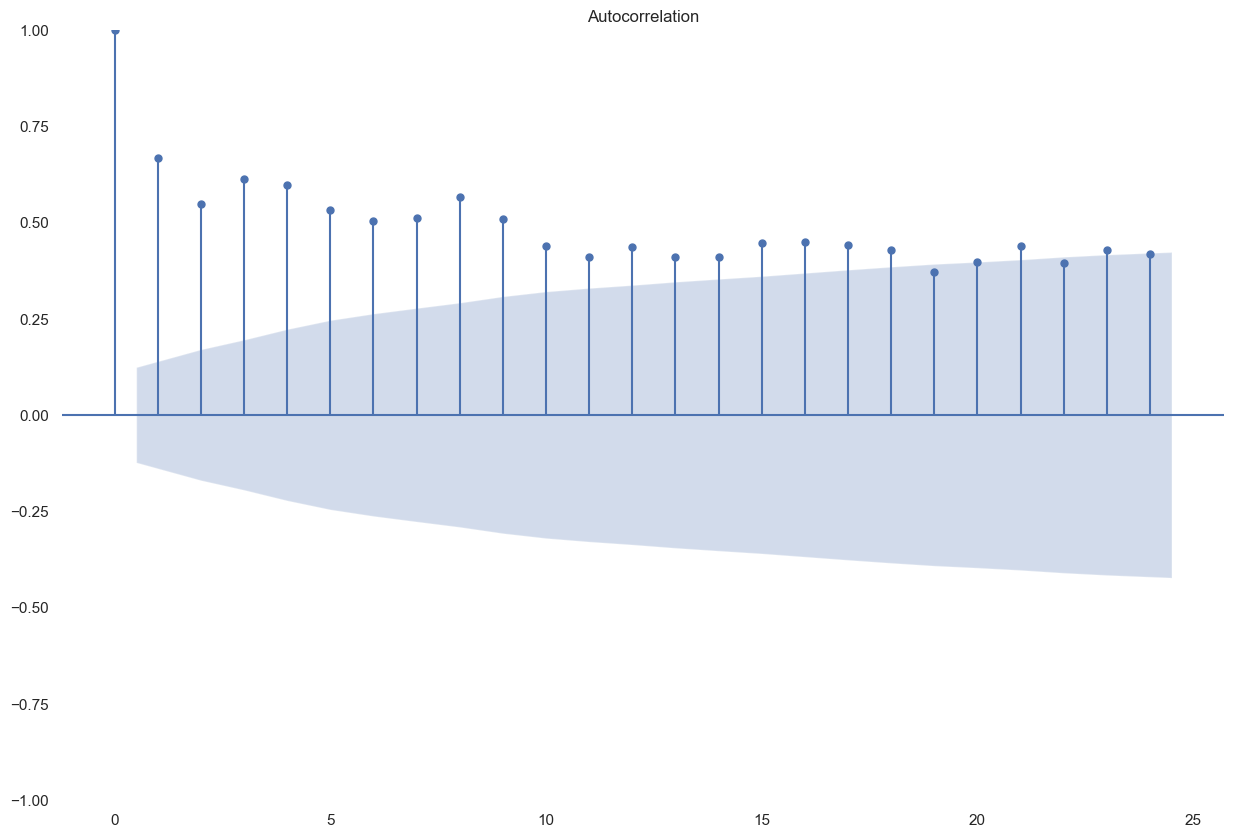

In [24]:
#acf plot
fig = tsaplots.plot_acf(df_inflation_repo['All items inflation'])
plt.box(False)
plt.show()

The correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

# Forecasting the model with AR

predicted=1.280755, expected=1.049780
predicted=1.503522, expected=1.508043
predicted=1.326461, expected=2.344008
predicted=1.581278, expected=2.806452
predicted=1.754997, expected=0.815814
Test RMSE: 0.833
            Inflation rate (including predictions)
2022-12-31                                1.280755
2023-03-31                                1.503522
2023-06-30                                1.326461
2023-09-30                                1.581278
2023-12-31                                1.754997
            Inflation rate (including expected)
2022-12-31                             1.049780
2023-03-31                             1.508043
2023-06-30                             2.344008
2023-09-30                             2.806452
2023-12-31                             0.815814


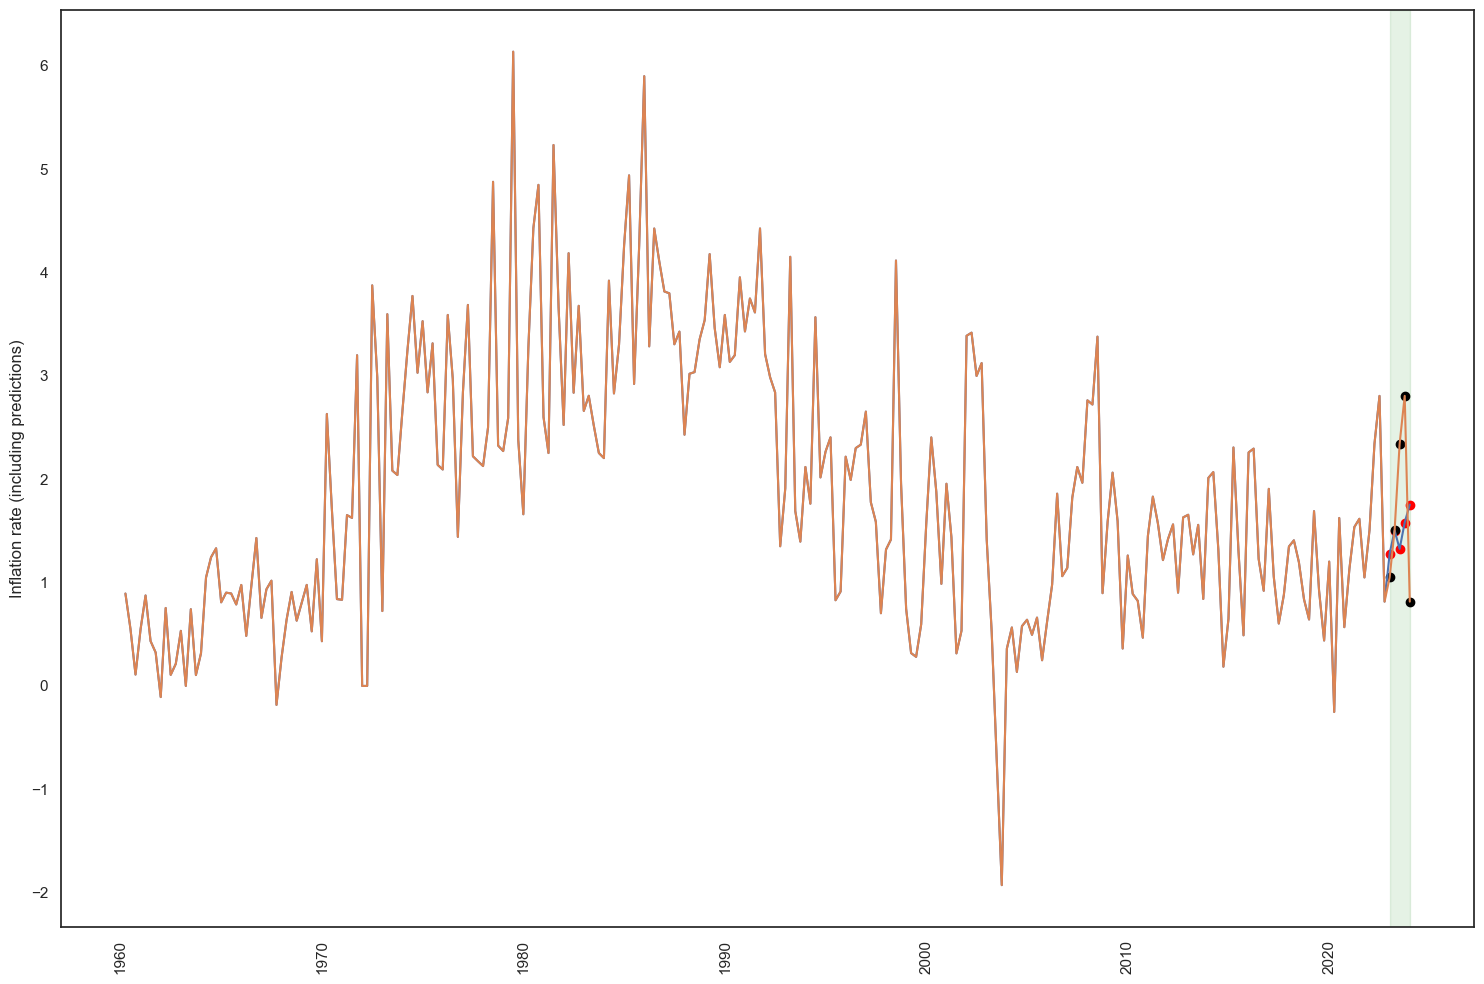

In [25]:
#Predicting the inflation
X = list(df_inflation_repo['All items inflation'])
train, test = X[1:len(X)-5], X[len(X)-5:]

# train autoregression
window = 25
model = AutoReg(train, 
                lags=25, 
                old_names=False)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# line graph
df_inflation_repo_predictions = pd.concat([df_inflation_repo['All items inflation'],pd.DataFrame(predictions)], 
                                    axis=0).rename(columns={0:'Inflation rate (including predictions)'})

df_inflation_repo_expected = pd.concat([df_inflation_repo['All items inflation'],pd.DataFrame(test)], 
                                    axis=0).rename(columns={0:'Inflation rate (including expected)'})

#creating list of date
start_date = "1/04/1960"
end_date = "1/04/2024"
Date = list(pd.date_range(start_date, end_date, freq='Q'))

df_inflation_repo_predictions.index = Date
print(df_inflation_repo_predictions.tail())

#plotting inflation with predicted values
fig, ax = plt.subplots()
sns.lineplot(x=df_inflation_repo_predictions.index, 
            y='Inflation rate (including predictions)', 
           data=df_inflation_repo_predictions)

plt.xticks(rotation = 90)

ax.axvspan('2022-12-31','2023-12-31',
           alpha=0.1, 
           color="green")

ax.scatter(df_inflation_repo_predictions.index[-5:],
           df_inflation_repo_predictions['Inflation rate (including predictions)'][-5:], 
           color='red')

#plotting inflation with expected values
df_inflation_repo_expected.index = Date
print(df_inflation_repo_expected.tail())

sns.lineplot(x=df_inflation_repo_expected.index, 
            y='Inflation rate (including expected)', 
           data=df_inflation_repo_expected)

plt.xticks(rotation = 90)

ax.scatter(df_inflation_repo_expected.index[-5:], 
           df_inflation_repo_expected['Inflation rate (including expected)'][-5:], 
           color='black')

plt.tight_layout()

plt.show()



The forecasted predicted points are highlighted with red markers, the test/expected value points are in highlighted with black markers.

# Final thoughts

The forecast has a deviation of less than 1 percent per quarter which is a decent for forecast.